In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Load the data
df = pd.read_csv('../data/Food_Time_Data_Set.csv')

In [63]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


In [64]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Unnamed: 14', 'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')

# Exploratory Data Analysis

In [65]:
df = df.drop(columns=['ID','Delivery_person_ID','Unnamed: 14'], axis=1)

In [66]:
df.isna().sum()

Delivery_person_Age              1
Delivery_person_Ratings          1
Restaurant_latitude              1
Restaurant_longitude             1
Delivery_location_latitude       1
Delivery_location_longitude      1
Type_of_order                    1
Type_of_vehicle                  1
temperature                      6
humidity                         6
precipitation                    6
weather_description              6
Traffic_Level                  916
Distance (km)                  921
TARGET                         542
dtype: int64

In [67]:
df.shape

(10001, 15)

In [68]:
#Rename distance column (personal preference)
df = df.rename({'Distance (km)':'Distance_km'}, axis=1)

In [69]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Traffic_Level', 'Distance_km', 'TARGET'],
      dtype='object')

In [70]:
df.dtypes

Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
Traffic_Level                   object
Distance_km                    float64
TARGET                          object
dtype: object

In [71]:
# TARGET should be a float
df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')

In [72]:
df.dtypes

Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
Traffic_Level                   object
Distance_km                    float64
TARGET                         float64
dtype: object

### Handle Missing Values

For numerical columns, missing values were filled using the median. The median is preferred over the mean because it is less sensitive to outliers. Since some features have extreme values (skewed distributions), the mean can be misleading, whereas the median provides a more robust measure of central tendency.

For categorical columns, missing values were filled using the mode (most frequent value). Since categorical data lacks numerical meaning, computing a mean or median isn’t possible. Using the mode ensures that the most common category is maintained, preserving the dataset's natural distribution and preventing the introduction of artificial or non-existent categories.

In [73]:
num_cols = df.select_dtypes(include=['float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [74]:
# Verify that there are no missing values
df.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
temperature                    0
humidity                       0
precipitation                  0
weather_description            0
Traffic_Level                  0
Distance_km                    0
TARGET                         0
dtype: int64

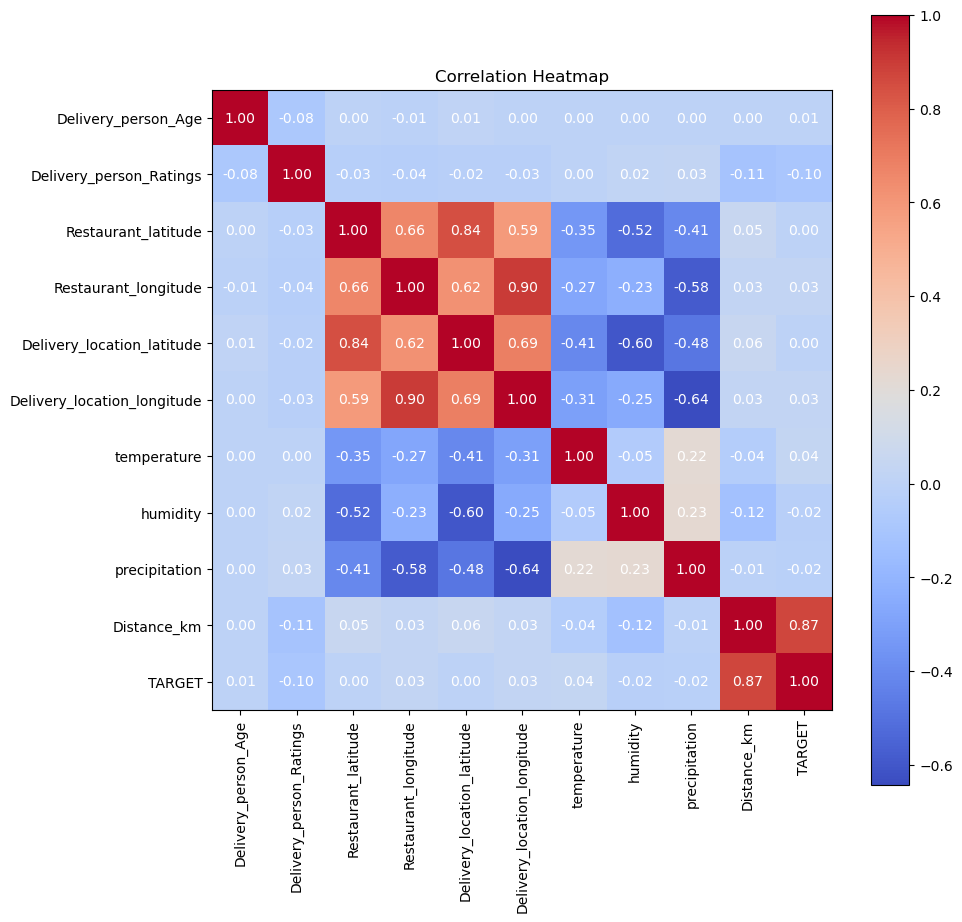

In [75]:
import matplotlib.pyplot as plt

corr = df[num_cols].corr()

plt.figure(figsize=(10, 10))

plt.imshow(corr, cmap='coolwarm', interpolation='none')

plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.title('Correlation Heatmap')

plt.show()


There’s a strong correlation between Distance and Delivery Time. Now, let’s explore how some categorical features, such as weather and traffic level, interact with these variables. As a rule of thumb, both weather conditions and traffic levels are expected to influence delivery times.

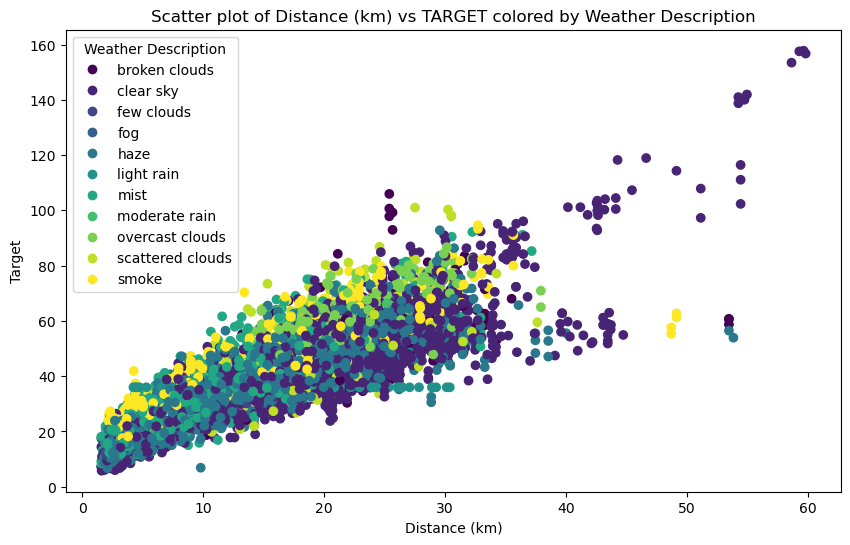

<Figure size 640x480 with 0 Axes>

In [76]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Distance_km'], df['TARGET'], c=df['weather_description'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Distance (km)')
plt.ylabel('Target')
plt.title('Scatter plot of Distance (km) vs TARGET colored by Weather Description')


handles, labels = scatter.legend_elements(prop="colors")
legend_labels = df['weather_description'].astype('category').cat.categories
plt.legend(handles, legend_labels, title="Weather Description")

plt.show()
plt.savefig("../plots/scatter_plot_weather.png", dpi=300, bbox_inches="tight")


This graph does not reveal a clear pattern, suggesting that weather conditions have minimal influence on the relationship between distance and travel time.

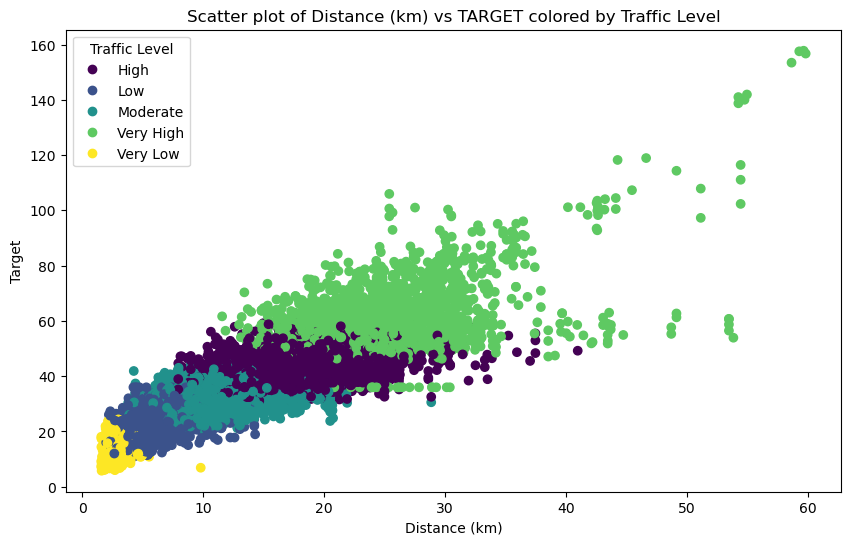

<Figure size 640x480 with 0 Axes>

In [77]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Distance_km'], df['TARGET'], c=df['Traffic_Level'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Distance (km)')
plt.ylabel('Target')
plt.title('Scatter plot of Distance (km) vs TARGET colored by Traffic Level')


handles, labels = scatter.legend_elements(prop="colors")
legend_labels = df['Traffic_Level'].astype('category').cat.categories
plt.legend(handles, legend_labels, title="Traffic Level")

plt.show()
plt.savefig("../plots/scatter_plot_traffic.png", dpi=300, bbox_inches="tight")

Traffic conditions, on the other hand, appear to have a much stronger impact on the relationship between delivery times. In fact, with the exception of very long distances (over 40 km), delivery times seem to be almost entirely determined by traffic conditions, rather than the distance itself.

Frankly, the relationship between distance and delivery time seems too perfect. The data suggests an almost unbelievable correlation between distance and traffic level, where traffic levels consistently increase as distance grows. This raises suspicions that the data may be synthetic as it doesn't completely represent reality.

Given the significant impact of traffic on delivery time, it would be valuable to assess whether the type of vehicle used for delivery also influences the delivery time and distance. I will use a box plot for this

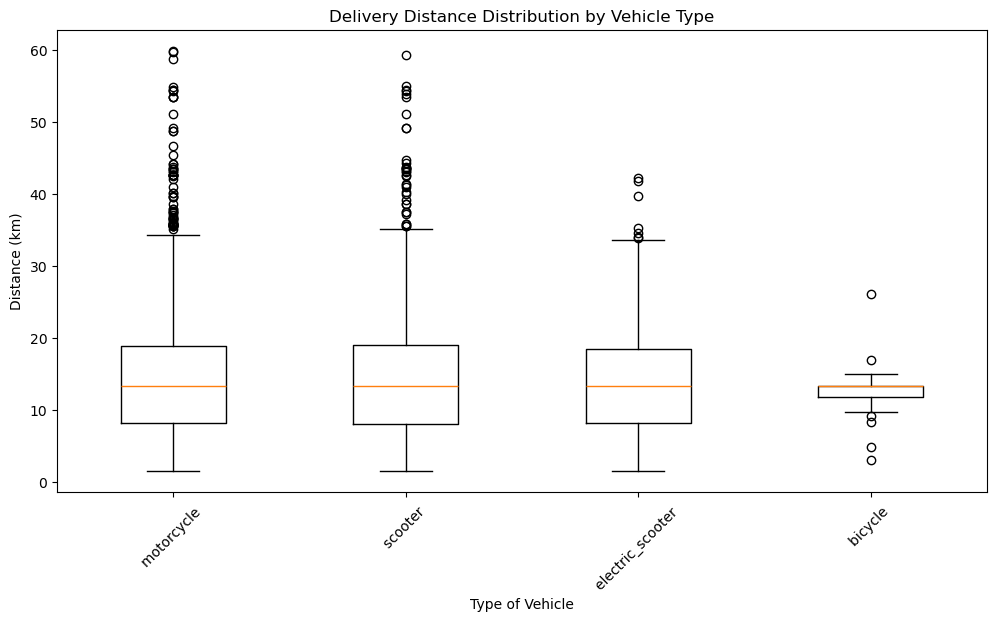

In [78]:
# Create the boxplot for Delivery Distance Distribution by Vehicle Type
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Type_of_vehicle'] == vehicle]['Distance_km'] for vehicle in df['Type_of_vehicle'].unique()])

# Set labels and title
plt.title("Delivery Distance Distribution by Vehicle Type")
plt.xticks(range(1, len(df['Type_of_vehicle'].unique()) + 1), df['Type_of_vehicle'].unique(), rotation=45)
plt.xlabel('Type of Vehicle')
plt.ylabel('Distance (km)')

# Display the plot
plt.show()

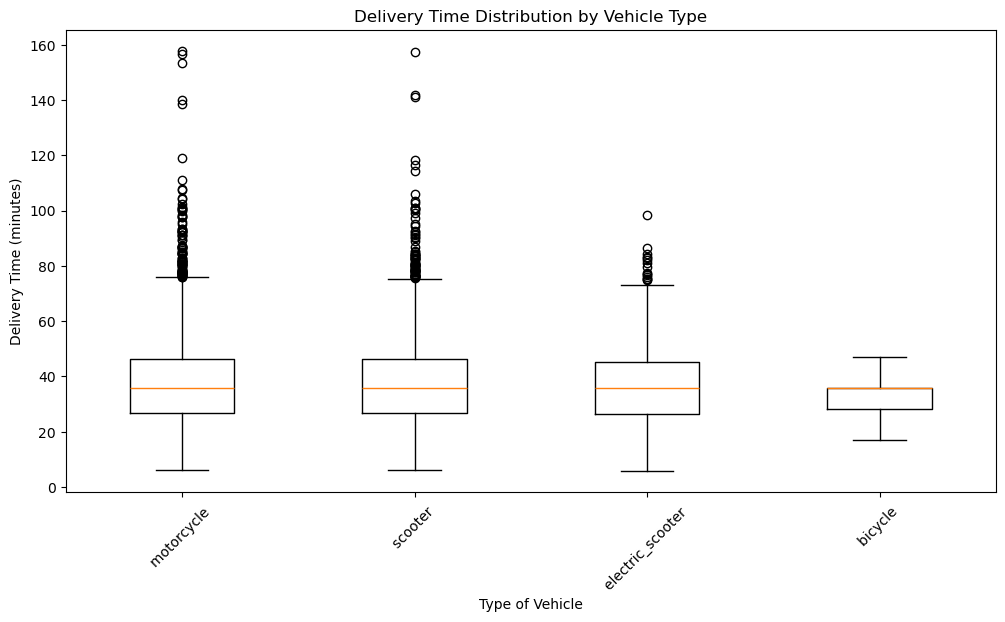

In [79]:
# Create the boxplot for Delivery Distance Distribution by Vehicle Type
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Type_of_vehicle'] == vehicle]['TARGET'] for vehicle in df['Type_of_vehicle'].unique()])

# Set labels and title
plt.title("Delivery Time Distribution by Vehicle Type")
plt.xticks(range(1, len(df['Type_of_vehicle'].unique()) + 1), df['Type_of_vehicle'].unique(), rotation=45)
plt.xlabel('Type of Vehicle')
plt.ylabel('Delivery Time (minutes)')

# Display the plot
plt.show()

From the box plot, it is evident that the delivery time and distance for bicycles is skewed, indicating that there may be a few unusually long delivery times. On the other hand, the delivery times and distance for motorcycles, scooters, and electric scooters are more consistent, with most of the delivery times falling within a similar range, suggesting less variability among these vehicle types.

<Figure size 1500x1000 with 0 Axes>

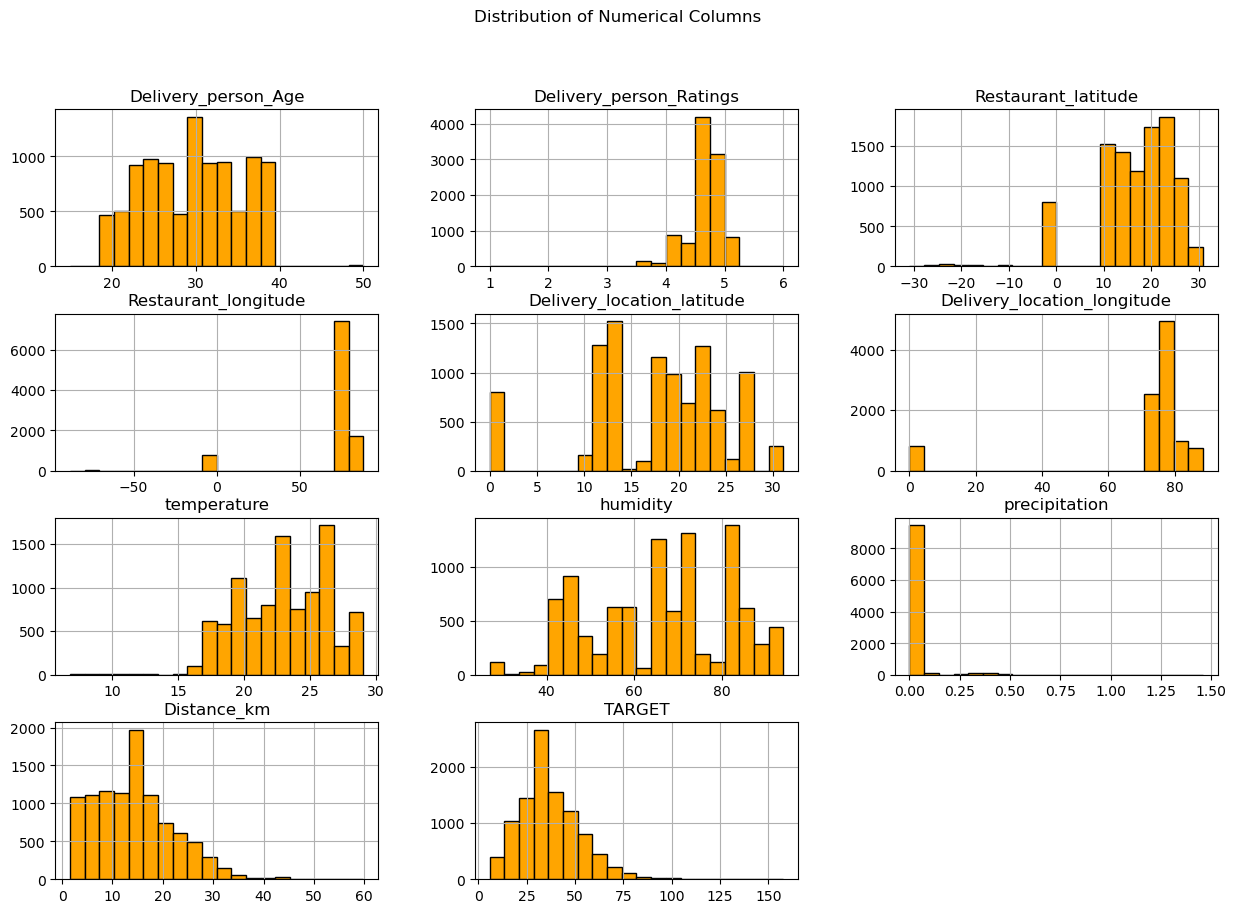

In [80]:
plt.figure(figsize=(15, 10))
df[num_cols].hist(bins=20, figsize=(15, 10), color='orange', edgecolor='black')
plt.suptitle("Distribution of Numerical Columns")
plt.show()

From the plot, none of the numerical columns appear to follow a normal distribution. While the TARGET (delivery time) distribution resembles a normal distribution, it is noticeably skewed to the right. Additionally, there are some outliers in the delivery times, particularly those exceeding 100 minutes, which stand out as outliers. In the modelling face, there will be a need to deal with the outliers, especially for the target variables.

# Handle Outliers

I will use capping to handle it through winsorization which will cap the delivery times that exceed the 95th percentile. I expect this to limit the extreme values while retaining the general pattern of the data.

In [81]:
upper_limit = df['TARGET'].quantile(0.95) 
df_win = df[df['TARGET'] <= upper_limit]

Plot the histogram to see the data

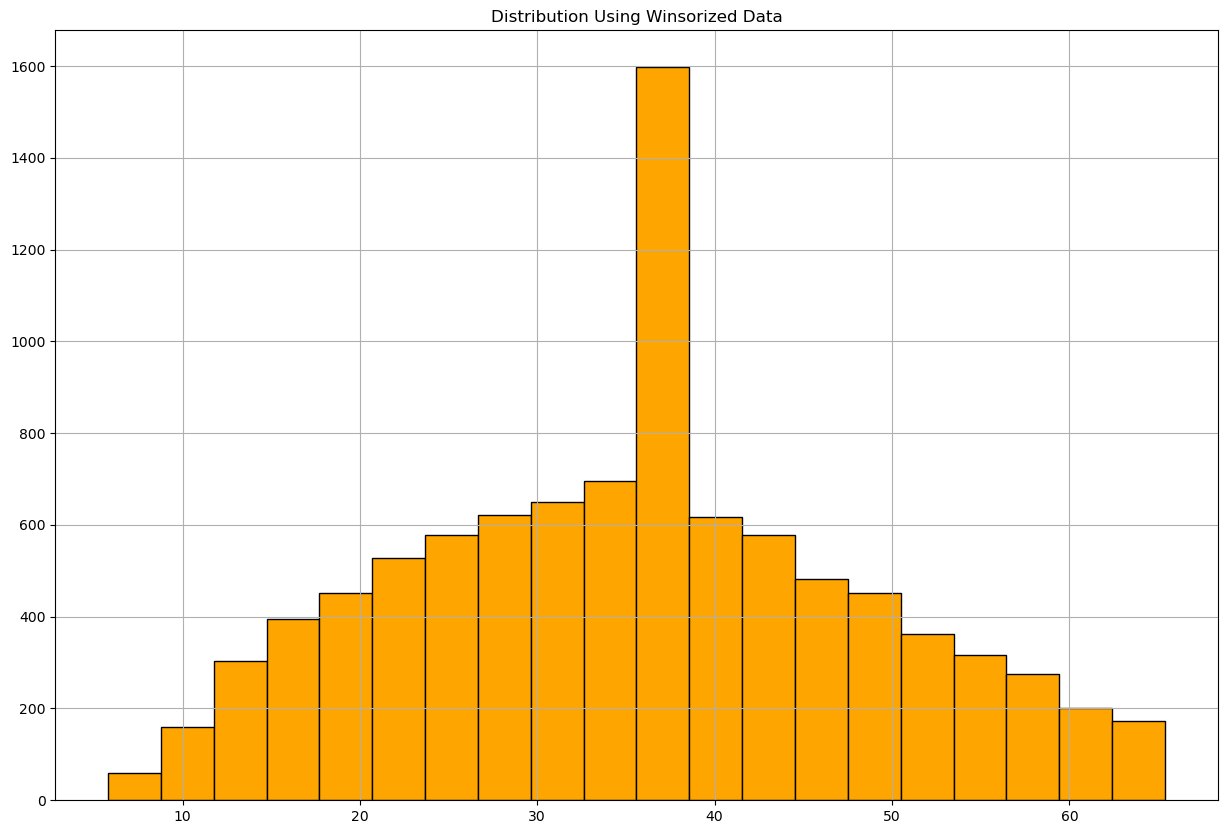

In [82]:
df_win['TARGET'].hist(bins=20, figsize=(15, 10), color='orange', edgecolor='black')
plt.title("Distribution Using Winsorized Data")
plt.show()

I want to try a second option which is to log transform the target variable to see it the outcome

In [83]:
import numpy as np
df_log = df.copy()
df_log['TARGET'] = np.log(df_log['TARGET'])

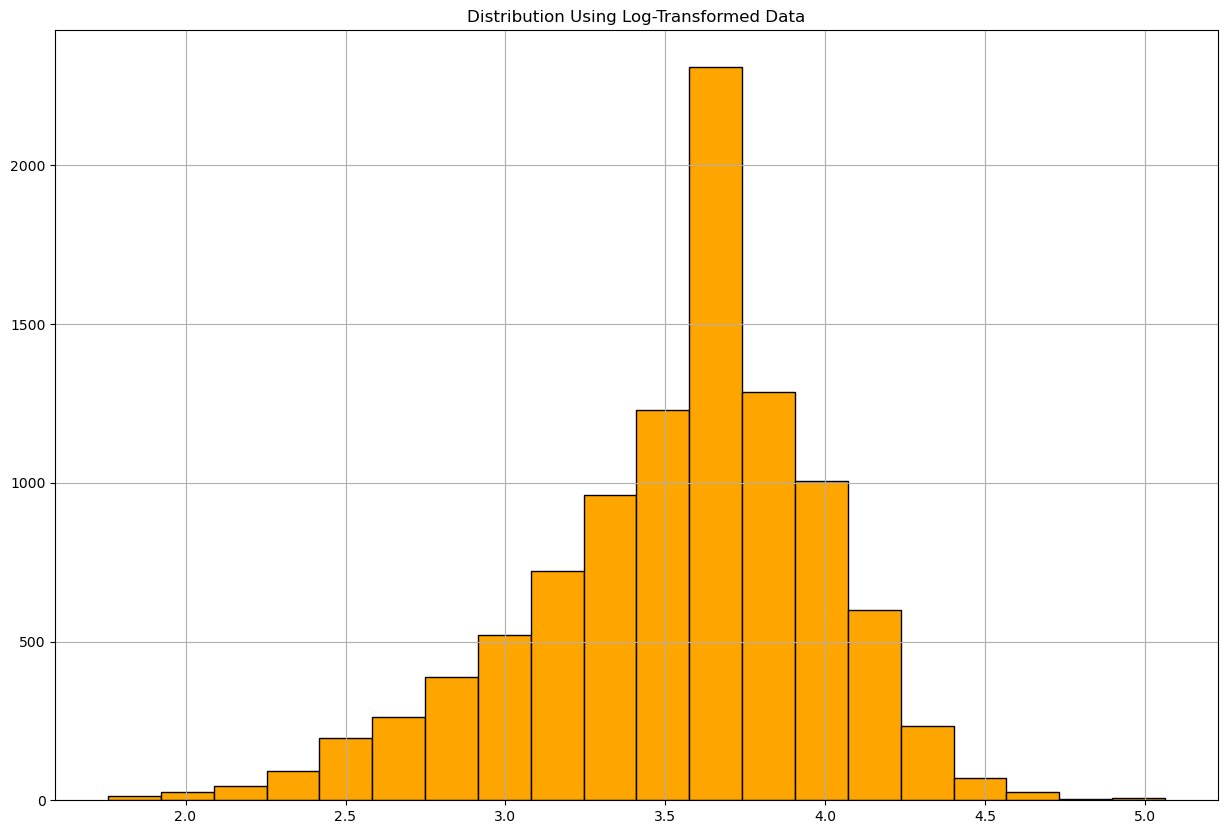

In [84]:
df_log['TARGET'].hist(bins=20, figsize=(15, 10), color='orange', edgecolor='black')
plt.title("Distribution Using Log-Transformed Data")
plt.show()

I think the winsorisation approach is better when plotted. So I'll go with that. I will use the new dataframe 'df_win' for modelling phase.

I will proceed to split the data so I can have training and testing.

In [85]:
split_ratio = 0.8
split_index = int(len(df_win) * split_ratio)

df_win_sampled = df_win.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into training and testing sets
train_data = df_win_sampled[:split_index]
test_data = df_win_sampled[split_index:]
test_data.to_csv("../data/test.csv", index=False)
train_data.to_csv("../data/train.csv", index=False)

# Modelling

### Encode Categorical Features

The only categorical column with ordinal is the Traffic_Level, while others are nominal, so I will use mixed encoding strategy. Where manual mapping to  encode Traffic_Level and One-Hot-Encoding will be used on others

In [86]:
traffic_mapping = {'Very Low': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}
train_data['Traffic_Level'] = train_data['Traffic_Level'].map(traffic_mapping)

train_data = pd.get_dummies(train_data, columns=['Type_of_order', 'Type_of_vehicle', 'weather_description'], drop_first=True).astype(int)


/var/folders/hv/2n5lx1kn6650h0h76s2780wn5h1j9g/T/ipykernel_62549/2110166563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Traffic_Level'] = train_data['Traffic_Level'].map(traffic_mapping)


In [87]:
pd.set_option('display.max_columns', None)
train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Traffic_Level,Distance_km,TARGET,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,weather_description_clear sky,weather_description_few clouds,weather_description_fog,weather_description_haze,weather_description_light rain,weather_description_mist,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_smoke
0,34,4,22,73,22,73,22,43,0,2,17,31,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
1,23,4,12,76,12,76,20,68,0,1,4,23,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,29,4,26,75,26,75,19,68,0,2,12,28,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,26,4,19,72,19,72,27,57,0,1,2,21,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,37,4,13,80,13,80,26,88,0,1,4,31,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [88]:
from sklearn.model_selection import train_test_split

X=train_data.drop(["TARGET"],axis=1)
y=train_data["TARGET"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1, shuffle=True)

In [89]:
train_data.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Traffic_Level', 'Distance_km', 'TARGET',
       'Type_of_order_Drinks ', 'Type_of_order_Meal ', 'Type_of_order_Snack ',
       'Type_of_vehicle_electric_scooter ', 'Type_of_vehicle_motorcycle ',
       'Type_of_vehicle_scooter ', 'weather_description_clear sky',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_haze', 'weather_description_light rain',
       'weather_description_mist', 'weather_description_overcast clouds',
       'weather_description_scattered clouds', 'weather_description_smoke'],
      dtype='object')

In [90]:
# First, I will use the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()

In [91]:
lr.fit(X_train, y_train)

LinearRegression()

It will be a great idea to just see the weights (slope) assigned to each feature after training

In [92]:
dict={'Input Columns':X.columns,'Weights':lr.coef_}
lr_weights=pd.DataFrame(dict)
lr_weights

,Input Columns,Weights
0,Delivery_person_Age,-2.689203e-03
1,Delivery_person_Ratings,-4.583920e-02
2,Restaurant_latitude,1.040307e-01
3,Restaurant_longitude,9.966824e-03
4,Delivery_location_latitude,-1.099475e-01
5,Delivery_location_longitude,6.032103e-02
6,temperature,3.018203e-02
7,humidity,9.621050e-03
8,precipitation,2.220446e-16
9,Traffic_Level,8.262021e+00


In [93]:
y_pred = lr.predict(X_test)

In [94]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 13.20
R^2: 0.92
Mean Absolute Error: 2.80


I will try to scale the data to see if there's any difference

In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [96]:
y_pred_scaled = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)
mae = mean_absolute_error(y_test, y_pred_scaled)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 822.70
R^2: -3.69
Mean Absolute Error: 26.57


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env2/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Scaling the features did not improve the performance of the model

### Check For Training Score and Testing Score and Compare

In [97]:
train_score = lr.score(X_train, y_train)

In [98]:
print(f'Training Score {train_score}')

Training Score 0.9263997086596417


In [99]:
testing_score = lr.score(X_test, y_test)
print(f'Testing Score {testing_score}')

Testing Score 0.9246630897442084


My testing score is higher than my training score. Yet to decide if the model is overfitting. Before concluding, I will use cross validation techniche.

In [100]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores and their mean
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

Cross-validation scores: [0.925581   0.93101284 0.92546031 0.92934962 0.91554596]
Mean cross-validation score: 0.93


I will use random forest and compare it

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# Perform 5-Fold Cross-Validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name}: Mean R² = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")

Linear Regression: Mean R² = 0.9254, Std = 0.0054
Random Forest: Mean R² = 0.9531, Std = 0.0022


In [102]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
}

# Grid search on the best model (Random Forest in this case)
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best Params: {grid_search.best_params_}")
print(f"Best R² Score: {grid_search.best_score_:.4f}")


Best Params: {'max_depth': 20, 'n_estimators': 200}
Best R² Score: 0.9535


# Diagnose the model further

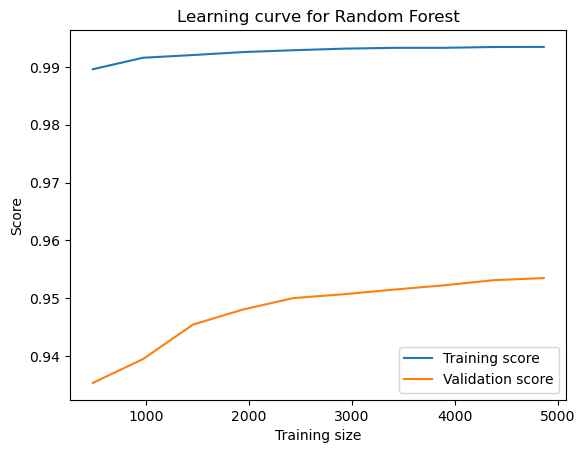

In [103]:
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(rf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning curve for Random Forest')
plt.legend()
plt.show()

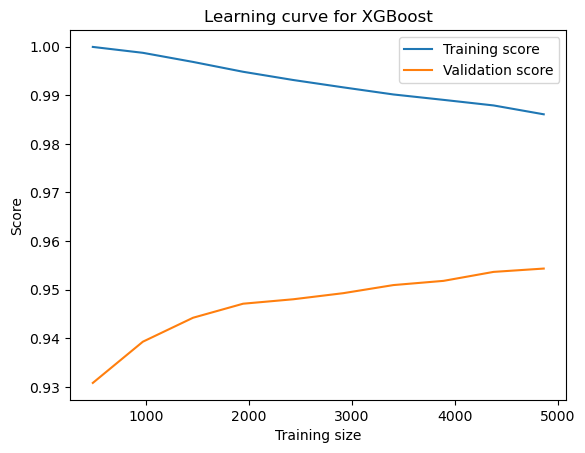

In [104]:
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

xg = XGBRegressor(n_estimators=100, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(xg, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')

plt.title('Learning curve for XGBoost')
plt.legend()
plt.show()

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_loss_curve(model, X, y, loss_function=mean_squared_error, test_size=0.2, n_splits=10):
    """
    Plots a loss curve for any regression model.
    
    Parameters:
    - model: The machine learning model (e.g., XGBRegressor, RandomForestRegressor).
    - X, y: Features and target values.
    - loss_function: Loss function to use (default: Mean Squared Error).
    - test_size: Fraction of data for validation.
    - n_splits: Number of training size increments.

    Returns:
    - Plots the training and validation loss curve.
    """

    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    train_sizes = np.linspace(0.1, 1.0, n_splits)  # Training sizes from 10% to 100%
    train_loss = []
    val_loss = []

    for size in train_sizes:
        X_train_sub = X_train[:int(len(X_train) * size)]
        y_train_sub = y_train[:int(len(y_train) * size)]

        # Train the model on subset
        model.fit(X_train_sub, y_train_sub)

        # Predict on training and validation sets
        y_train_pred = model.predict(X_train_sub)
        y_val_pred = model.predict(X_val)

        # Compute loss
        train_loss.append(loss_function(y_train_sub, y_train_pred))
        val_loss.append(loss_function(y_val, y_val_pred))

    # Plot loss curve
    plt.plot(train_sizes * len(X_train), train_loss, label="Training Loss", marker='o')
    plt.plot(train_sizes * len(X_train), val_loss, label="Validation Loss", marker='s')
    plt.xlabel("Training Size")
    plt.ylabel("Loss (MSE)")
    plt.title(f"Loss Curve for {model.__class__.__name__}")
    plt.legend()
    plt.show()


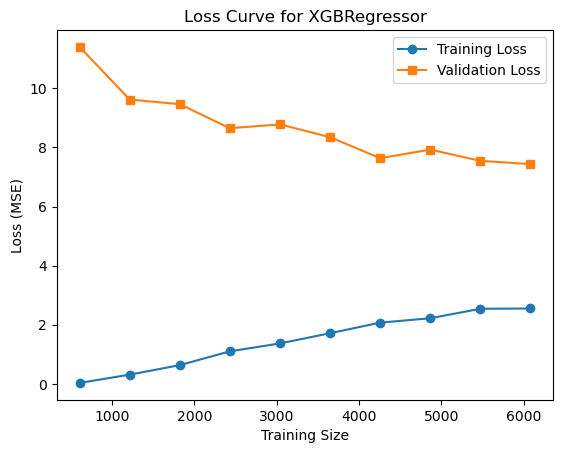

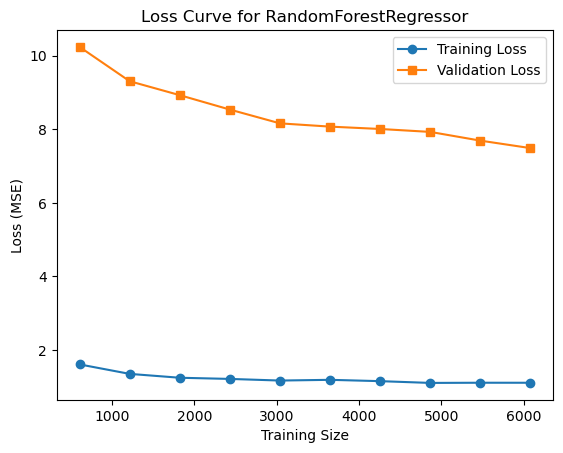

In [109]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


plot_loss_curve(xgb_model, X, y)

plot_loss_curve(rf_model, X, y)

I believe the model is still overfitting. The difference between the training loss and validation loss exceeds 10%, with the training loss being significantly lower. This suggests that the model is fitting the training data too closely and is not generalizing well to the validation set. To address this, I plan to experiment with regularization techniques for the linear model to help reduce overfitting and improve generalization.

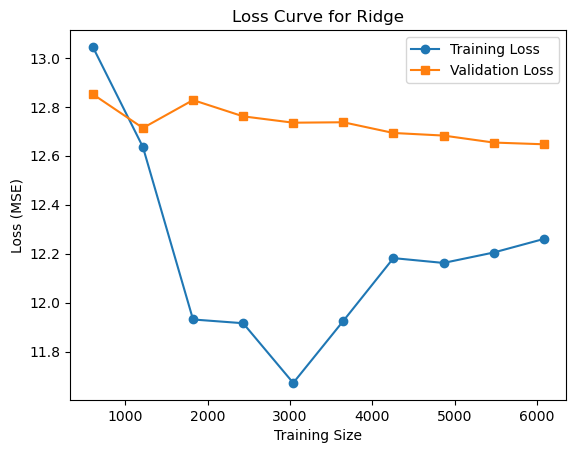

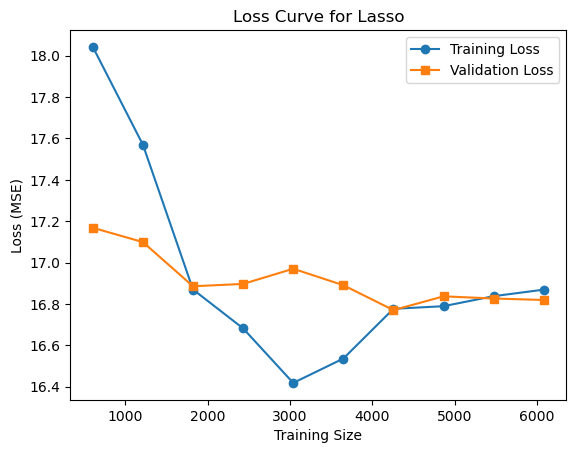

In [108]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=5.0)
lasso = Lasso(alpha=0.5)


plot_loss_curve(ridge, X, y)

plot_loss_curve(lasso, X, y)

Ridge regression seem to work best because the validation loss is lower and closer to the training loss.

Thiis is the end of my experiment. I will now move to a standard python file to train the model using ridge regression.